import necessary libraries

In [355]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 Step 1: Load the Dataset

In [356]:
car_numeric_data = pd.read_csv('CarPrice_Assignment.csv')

Step 2: Select Numerical Features

In [357]:

numerical_columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
                     'citympg', 'highwaympg', 'price']

car_numeric = car_numeric_data[numerical_columns]

Step 3: Split Features  and Target

In [358]:
X = car_numeric.drop(columns='price')
y = car_numeric['price']

Step 4: Normalize the Features

In [359]:
X_normalized = (X - X.mean()) / X.std()

Step 5: Define the Linear Regression Model with Gradient Descent


In [360]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.iterations):
            # Linear prediction
            y_predicted = np.dot(X, self.weights) + self.bias

            # gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


 Step 6: Start the model and train it

In [361]:
model = LinearRegression(learning_rate=0.01, iterations=10000)
model.fit(X_normalized.values, y)


Step 7: Predict prices using the trained model


In [362]:
predicted_prices = model.predict(X_normalized.values)

Step 8: Print Model Equation


In [363]:
print("The linear model equation is:")
model_equation = f"Price = {model.bias:.2f} + " + " + ".join([f"{w:.2f} * {col}" for w, col in zip(model.weights, X.columns)])
print(model_equation)

The linear model equation is:
Price = 13276.71 + 364.34 * symboling + 978.75 * wheelbase + -1112.15 * carlength + 1003.16 * carwidth + 475.48 * carheight + 937.95 * curbweight + 4833.34 * enginesize + -263.01 * boreratio + -950.68 * stroke + 1128.26 * compressionratio + 1340.04 * horsepower + 1118.53 * peakrpm + -1591.43 * citympg + 1054.66 * highwaympg


Step 9: Compare First Few Predicted Prices with Actual Prices


In [364]:
print("\nFirst few predicted prices vs actual prices:")
for i in range(5):
    print(f"Predicted: ${predicted_prices[i]:.2f}, Actual: ${y.values[i]:.2f}")


First few predicted prices vs actual prices:
Predicted: $12949.82, Actual: $13495.00
Predicted: $12949.82, Actual: $16500.00
Predicted: $17674.10, Actual: $16500.00
Predicted: $11979.70, Actual: $13950.00
Predicted: $16126.07, Actual: $17450.00


Mean Squared error

In [365]:
#Experimented with different alpha and iterations to find the optimal one.
mse = np.mean((predicted_prices - y.values)**2)
print(f"\nMean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 9410980.30


Plotting the Linear Model

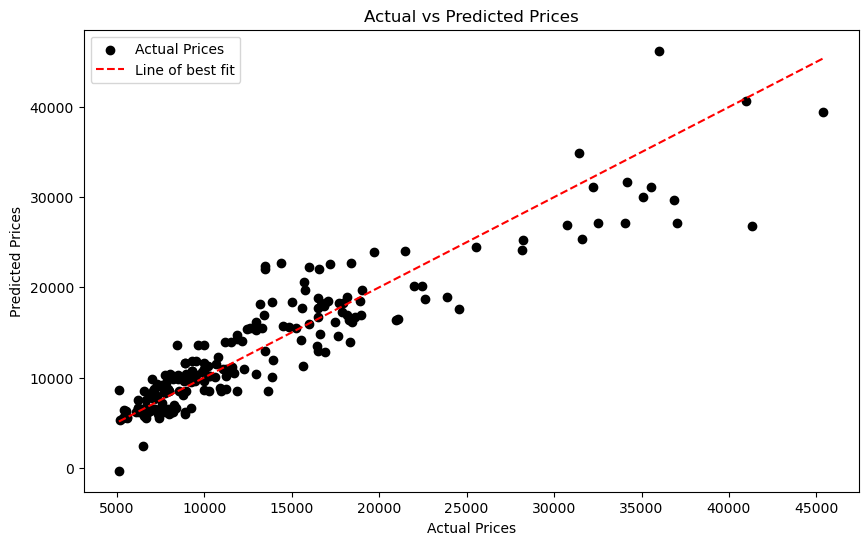

In [367]:
plt.figure(figsize=(10, 6))
plt.scatter(y.values, predicted_prices, color='black', label='Actual Prices')
# Adding regression line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Line of best fit') 

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()

plt.show()